# Reto | Análisis de Empleados en una red de correo electrónico

**Objetivo**:
El objetivo de este reto es poner en práctica los contenidos revisados durante el módulo realizando los siguientes pasos:
- Construir una red a partir de una base de datos y lograr una visualización adecuada a la red.
- Análisis de distancias en la red.
- Análisis de resiliencia.
- Análisis de centralidades.

In [5]:
# Montando google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
print(os.listdir('/content/drive/MyDrive/Colab'))

['stockerbot-export.csv', 'imagenes', 'user_movie_rating.txt', 'nutrientes_completo.csv', 'got-s1-edges.csv', 'got-s1-nodes_ext.csv', 'Red Eléctrica.xlsx', 'Geant2012.graphml', 'email-enron-only.mtx']


In [7]:
# Importando librerías
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Paso 1: Construcción de la Red
Construye una red no dirigida a partir de dataframe. Utiliza NetworkX para tener una visualización adecuada de la red, puedes manipular el color y tamaño de nodos y arcos.

In [8]:
# Cargando las interacciones de enron
df = pd.read_csv('/content/drive/MyDrive/Colab/email-enron-only.mtx',
                 sep=' ',
                 header=None,
                 names=['sender','receiver'])
df.head(10)

,sender,receiver
0,17,1
1,72,1
2,3,2
3,19,2
4,20,2
5,27,2
6,29,2
7,31,2
8,48,2
9,65,2


In [9]:
# Definiendo la red
g = nx.from_pandas_edgelist(
    df,
    source='sender',
    target = 'receiver',
    create_using=nx.Graph()
)

print('Nodos en total:',g.number_of_nodes())
print('Arcos en total:',g.number_of_edges())

Nodos en total: 143
Arcos en total: 623


### Visualización de la red

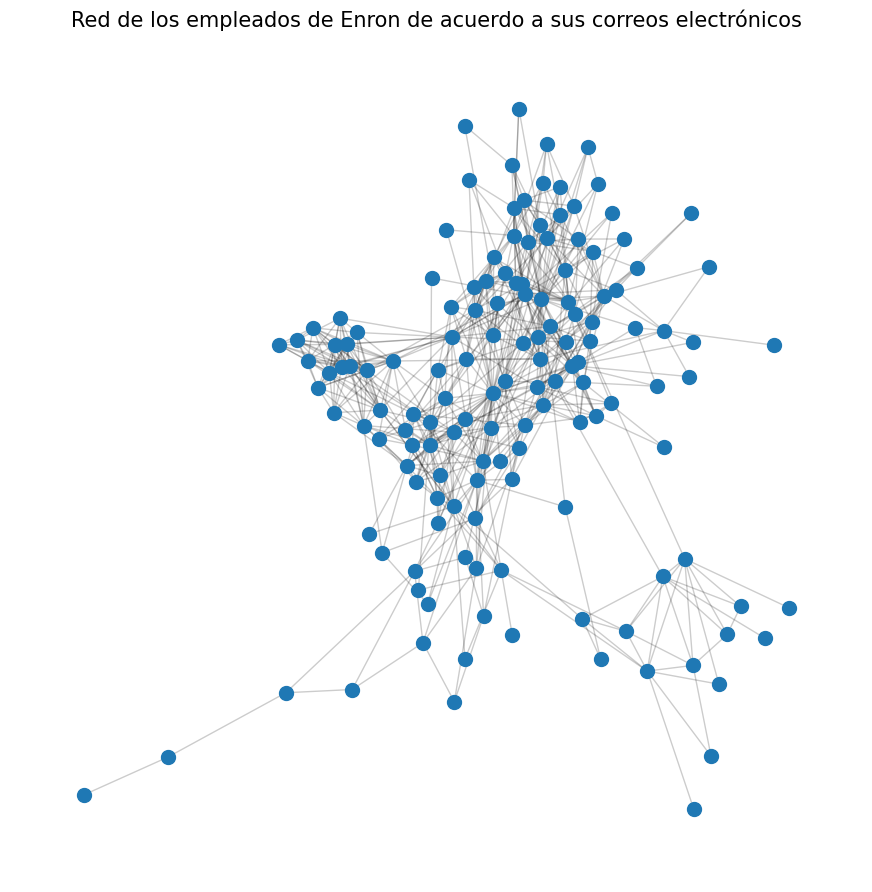

In [10]:
pos = nx.spring_layout(g,seed=42)
plt.figure(figsize=(11,11))
nx.draw_networkx_nodes(g,pos,node_size=100,label=False)
nx.draw_networkx_edges(g,pos,alpha=0.2)
plt.axis('off')
plt.title('Red de los empleados de Enron de acuerdo a sus correos electrónicos',
          fontsize=15)
plt.show()

### Obteniendo características:
Grados:

In [11]:
# Obteniendo los grados
deg = nx.degree(g)

# Nodo con grado máximo y su valor
nodo_max, grado_max = max(g.degree(), key=lambda x: x[1])

print("Nodo con grado máximo:", nodo_max)
print("Grado máximo:", grado_max)

# Nodo con grado mínimo y su valor
nodo_min, grado_min = min(g.degree(), key=lambda x: x[1])

print("Nodo con grado mínimo:", nodo_min)
print("Grado mínimo:", grado_min)


Nodo con grado máximo: 105
Grado máximo: 42
Nodo con grado mínimo: 15
Grado mínimo: 1


Diámetro:

In [12]:
diam = nx.diameter(g)
print('El diámetro es:', diam)

El diámetro es: 8


Distancia promedio más corta:

In [13]:
dist_prom = nx.average_shortest_path_length(g)
print('La distancia promedio más corto es:', dist_prom)

La distancia promedio más corto es: 2.967004826159756


## Paso 2: Identificación de la red
La red que estas analizando es conexa.  Un grafo conexo puede dividirse en un grafo disconexo al remover ciertos nodos o arcos o ambos. La habilidad de la red para funcionar incluso después de remover nodos o arcos se llama robustes o resiliencia.

In [14]:
# Remoción de nodos
# Tamaño mínimo de nodos a eliminar
n_nodes = nx.node_connectivity(g)

# Ejemplo de uno  de los cortes para desconectar g
min_node_cut = nx.minimum_node_cut(g)

print('Número mínimo de nodos a remover:', n_nodes)
print('Ejemplo de conjunto para desconectar :', min_node_cut)

Número mínimo de nodos a remover: 1
Ejemplo de conjunto para desconectar : {85}


In [15]:
# Remoción de arcos
# Arcos a eliminar
n_edges = nx.edge_connectivity(g)

# Conjunto de aristas a remover
min_edge_cut = nx.minimum_edge_cut(g)

print('Número mínimo de arcos a remover:', n_edges)
print('Ejemplo de conjunto para desconectar :', min_edge_cut)

Número mínimo de arcos a remover: 1
Ejemplo de conjunto para desconectar : {(130, 98)}


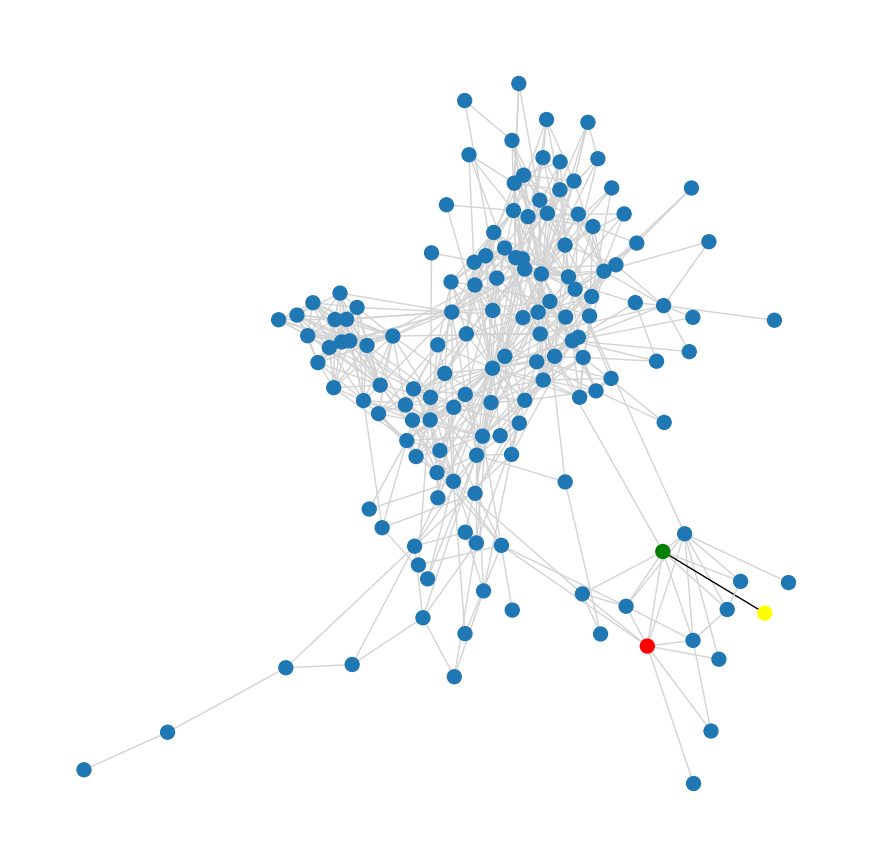

In [16]:
# Identificando con un color los nodos y arcos
# Nodos a destacar
nodos_color = {
    85:'red',
    130:'green',
    98:'yellow'
}

# Lista de colores para cada nodo
colores = []
for nodo in g.nodes:
    if nodo in nodos_color:
        colores.append(nodos_color[nodo])
    else:
        colores.append('#1f77b4')

# Arco a destacar
arco_color = {
    (130,98):'black'
}

# Lista de colores para arcos
colores_arcos = []
for u,v in g.edges():
    if (u,v) in arco_color:
        colores_arcos.append(arco_color[(u,v)])
    else:
        colores_arcos.append('lightgray')
# Graficar
pos = nx.spring_layout(g,seed=42)
plt.figure(figsize=(11,11))
nx.draw_networkx_nodes(g,pos,node_size=100,node_color=colores,label=False)
nx.draw_networkx_edges(g,pos,edge_color=colores_arcos)
plt.axis('off')
plt.show()

## Paso 3: Calcula y Visualiza las centralidades de la red
Las centralidades miden la importancia de los nodos basados en diferentes criterios. Con base en diferentes definiciones de importancia de un nodo, calcula la centralidad de grado, de intermediación y de cercanía. Muestra con un color diferente en la red a los 10 nodos más importantes para cada centralidad.

In [17]:
# Medidas de centralidad
grado = nx.degree_centrality(g)
intermediacion = nx.betweenness_centrality(g)
cercania = nx.closeness_centrality(g)

# Top 10 nodos más importantes para cada centralidad
top_grado = sorted(grado.items(),key=lambda x: x[1],reverse=True)[:10]
top_interm = sorted(intermediacion.items(),key=lambda x: x[1],reverse=True)[:10]
top_cerc = sorted(cercania.items(),key=lambda x: x[1],reverse=True)[:10]


In [18]:
top_grado

[(105, 0.29577464788732394),
 (17, 0.2112676056338028),
 (95, 0.1619718309859155),
 (48, 0.14084507042253522),
 (132, 0.13380281690140847),
 (43, 0.13380281690140847),
 (31, 0.1267605633802817),
 (74, 0.1267605633802817),
 (91, 0.1267605633802817),
 (72, 0.11971830985915494)]

In [19]:
top_interm

[(105, 0.19400604344556296),
 (17, 0.11088210445609471),
 (48, 0.09673142009207425),
 (91, 0.09118959870866389),
 (32, 0.08554735598477585),
 (95, 0.07579595400584722),
 (141, 0.06345441275176905),
 (22, 0.05846852533268458),
 (72, 0.05833907970763193),
 (51, 0.05199434696409222)]

In [20]:
top_cerc

[(105, 0.5),
 (17, 0.47019867549668876),
 (95, 0.4382716049382716),
 (74, 0.4369230769230769),
 (37, 0.4369230769230769),
 (48, 0.43558282208588955),
 (91, 0.43425076452599387),
 (43, 0.4316109422492401),
 (72, 0.42900302114803623),
 (22, 0.4251497005988024)]

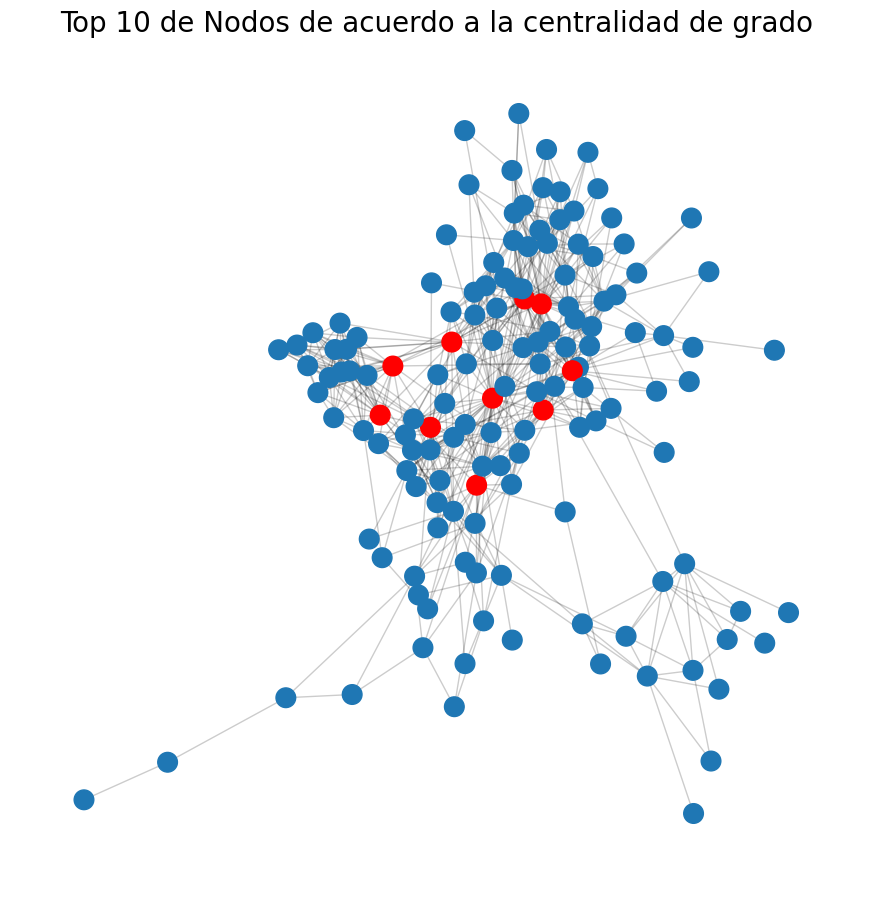

In [21]:
# Nodos
top_grado_nodos = [nodo for nodo,valor in top_grado]

# Diccionario de colores
colores_nodos = {n:'red' if n in top_grado_nodos else '#1f77b4' for n in g.nodes()}

# Graficar
pos = nx.spring_layout(g,seed=42)
plt.figure(figsize=(11,11))
nx.draw_networkx_edges(g,pos,alpha=0.2)
nx.draw_networkx_nodes(
    g,
    pos,
    node_size=200,
    node_color=[colores_nodos[n] for n in g.nodes()]
)
plt.axis('off')
plt.title('Top 10 de Nodos de acuerdo a la centralidad de grado',fontsize=20)
plt.show()


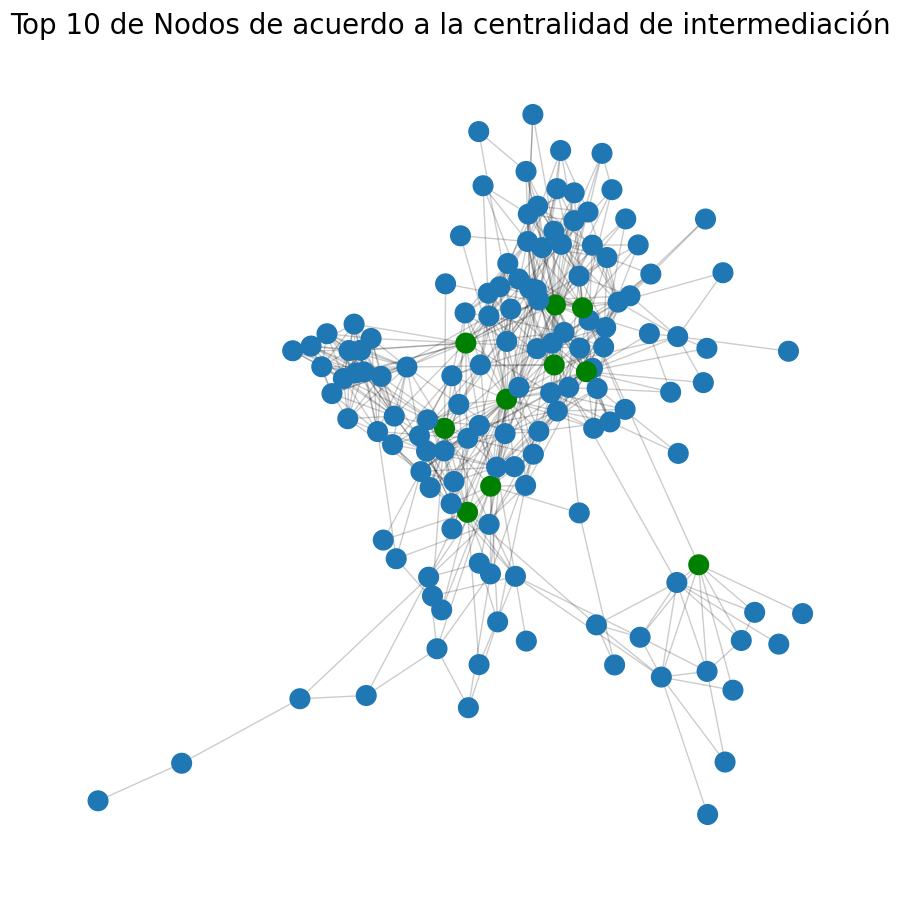

In [22]:
# Nodos
top_inter_nodos = [nodo for nodo,valor in top_interm]

# Diccionario de colores
colores_nodos = {n:'green' if n in top_inter_nodos else '#1f77b4' for n in g.nodes()}

# Graficar
pos = nx.spring_layout(g,seed=42)
plt.figure(figsize=(11,11))
nx.draw_networkx_edges(g,pos,alpha=0.2)
nx.draw_networkx_nodes(
    g,
    pos,
    node_size=200,
    node_color=[colores_nodos[n] for n in g.nodes()]
)
plt.axis('off')
plt.title('Top 10 de Nodos de acuerdo a la centralidad de intermediación',fontsize=20)
plt.show()

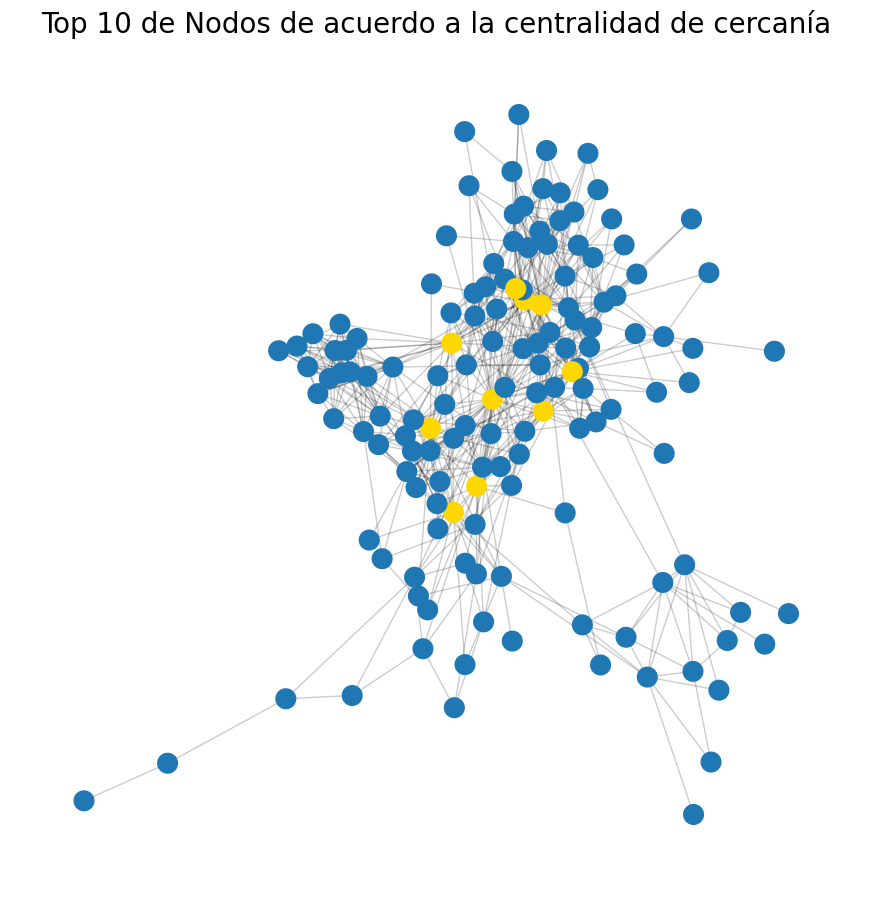

In [23]:
# Nodos
top_cerc_nodos = [nodo for nodo,valor in top_cerc]

# Diccionario de colores
colores_nodos = {n:'gold' if n in top_cerc_nodos else '#1f77b4' for n in g.nodes()}

# Graficar
pos = nx.spring_layout(g,seed=42)
plt.figure(figsize=(11,11))
nx.draw_networkx_edges(g,pos,alpha=0.2)
nx.draw_networkx_nodes(
    g,
    pos,
    node_size=200,
    node_color=[colores_nodos[n] for n in g.nodes()]
)
plt.axis('off')
plt.title('Top 10 de Nodos de acuerdo a la centralidad de cercanía',fontsize=20)
plt.show()

## Paso 4: Crea una Red Dirigida
Ahora sí importa quién manda el correo y quién lo recibe. En esta nueva red calcula el PageRank de los nodos, y para visualizarlos en la red.

In [24]:
# Grafo Dirigido
g_dir = nx.DiGraph(g)

# Pagerank
pagerank = nx.pagerank(g_dir)

# Top 10 de nodos
top_pagerank = sorted(pagerank.items(),key =lambda x: x[1],reverse=True)[:10]
top_nodos = [nodo for nodo,valor in top_pagerank]
print('Top 10 de nodos según PageRank:')
for nodo, valor in top_pagerank:
    print(nodo,round(valor,4))

Top 10 de nodos según PageRank:
105 0.0289
17 0.0224
95 0.0178
91 0.0144
124 0.0139
43 0.0138
48 0.013
74 0.013
32 0.0127
72 0.0126


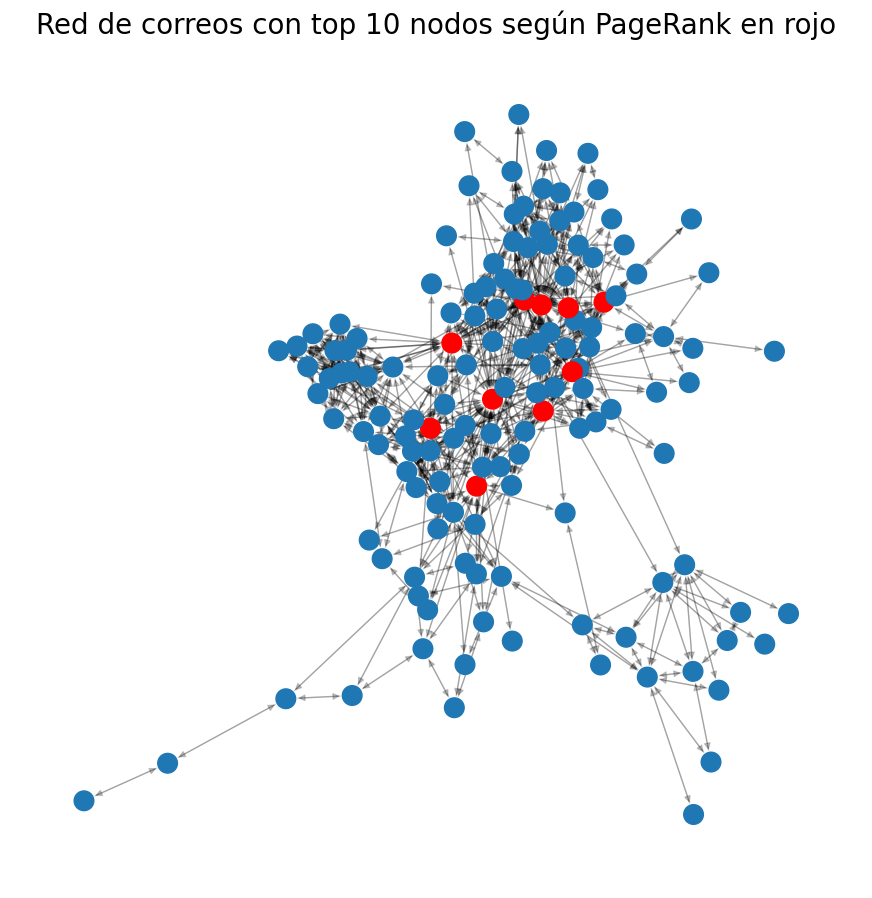

In [25]:
# Diccionario de colores
colores_nodos = {
    n:'red' if n in top_nodos else '#1f77b4' for n in g_dir.nodes()
}
# Lista de colores
colores = [colores_nodos[n] for n in g_dir.nodes()]

# Graficar
pos = nx.spring_layout(g_dir,seed=42)
plt.figure(figsize=(11,11))
nx.draw_networkx_edges(g_dir,pos,alpha=0.2,arrows=True)
nx.draw_networkx_nodes(g_dir,pos,node_color=colores,node_size=200)
plt.title('Red de correos con top 10 nodos según PageRank en rojo',fontsize=20)
plt.axis('off')
plt.show()